# This notebook will clean the public-sharing data

In [1]:
import os
import sys
import pandas as pd

## Remove NAs in bias_score

In [3]:
bias_scores = pd.read_csv('../data/bias_score_ron_2018.csv')

In [5]:
bias_scores.dropna(inplace=True)

In [7]:
len(bias_scores)

19014

In [104]:
bias_scores.to_csv('../data/bias_score_ron_2018.csv', index=False)

## Updata Category

In [9]:
category = pd.read_csv('../data/domain_category.csv')

In [11]:
category.dropna(inplace=True)

In [13]:
len(category)

8878

In [103]:
category.to_csv('../data/domain_category.csv', index=False)

## Filter politicians

In [46]:
qry_info = pd.read_csv('../data/qry_info.csv')

array([[<Axes: title={'center': 'relevance_score'}>]], dtype=object)

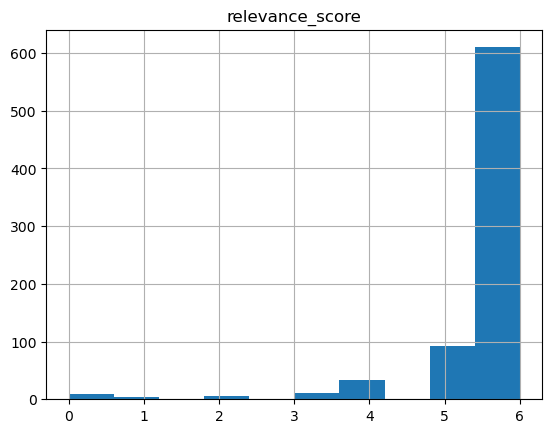

In [47]:
qry_info.hist(column="relevance_score")

In [68]:
house_df = qry_info[(qry_info['in_data']==True)&(qry_info['chamber']=='Rep')]

In [88]:
house_df[house_df['qry']=='Mike Johnson']

,qry,qry_clean,Twitter,governor,congress,candidate,state,district,party,chamber,date_started_position,full_term,Notes,relevance_score,in_data
387,Mike Johnson,Mike Johnson,RepMikeJohnson,False,True,False,LA,4.0,Republican,Rep,3-Jan-17,1,NaN,3.0,1


In [89]:
house_relevant_df = house_df[house_df['relevance_score'] > 2]

In [90]:
house_members_all = house_df['qry'].unique()

In [91]:
len(house_members_all)

437

In [93]:
house_member_relevant = house_relevant_df['qry'].unique()

In [94]:
len(house_member_relevant)

425

In [95]:
irrelavent_members = set(house_members_all)-set(house_member_relevant)

In [96]:
len(irrelavent_members)

12

In [98]:
print(irrelavent_members)

{'Chris Smith', 'Mario Díaz-Balart', 'Carol Miller', 'Roger Williams', 'Joaquín Castro', 'Jesús Chuy García', 'Jason Smith', 'Daniel Webster', 'Paul Mitchell', 'John Curtis', 'John Carter', 'John Lewis'}


In [99]:
len(house_relevant_df.groupby(['qry','party']))

425

In [100]:
house_clean = house_relevant_df.drop(columns=['governor', 'congress','candidate','chamber', 'date_started_position','full_term','Notes','in_data'])

In [101]:
house_clean

,qry,qry_clean,Twitter,state,district,party,relevance_score
151,Don Young,Don Young,DonYoungAK,AK,0.0,Republican,6.0
152,Don Young,Don Young,repdonyoung,AK,0.0,Republican,6.0
153,Bradley Byrne,Bradley Byrne,bradleybyrne,AL,1.0,Republican,5.0
154,Bradley Byrne,Bradley Byrne,RepByrne,AL,1.0,Republican,5.0
155,Martha Roby,Martha Roby,RepMarthaRoby,AL,2.0,Republican,6.0
...,...,...,...,...,...,...,...
703,Glenn Grothman,Glenn Grothman,RepGrothman,WI,6.0,Republican,6.0
707,Mike Gallagher,Mike Gallagher,RepGallagher,WI,8.0,Republican,6.0
708,David McKinley,David McKinley,RepMcKinley,WV,1.0,Republican,6.0
709,Alex Mooney,Alex Mooney,RepAlexMooney,WV,2.0,Republican,6.0


In [102]:
house_clean.to_csv('../data/qry_info.csv', index=False)